# Devoir 1

In [30]:
import numpy as np
import matplotlib.pyplot as plt

## Les bandits stochastiques

### [10 points] Les environnements de bandits stochastiques

#### Récompenses de distributions de Bernoulli

Complétez le code suivant pour implémenter un simulateur de bandit stochastique à $k$ actions avec récompenses générées par des distributions de Bernoulli. Votre classe doit recevoir en entrée les probabilités de succès de chaque action ainsi qu'un germe aléatoire permettant de fixer la réalisation de l'instance. La fonction _play_ doit échantillonner et retourner une récompense pour l'action demandée.

In [57]:
class BernoulliBandit:
    
    def __init__(self, probabilities, seed=None):
        self.probabilities = probabilities
        self.rng = np.random.default_rng(seed)

        self.n = len(probabilities)
        self.optimal_action = np.argmax(probabilities)
        self.optimal_reward = probabilities[self.optimal_action]

        self.action_history = []
        self.reward_history = []

    def play(self, action):
        # pattern factory avec algo pour chaque bandit serait mieux
        action_reward = self.rng.binomial(1, self.probabilities[action])

        self.action_history.append(action)
        self.reward_history.append(action_reward)
        return action_reward
    
    # # Ajouter pour simplifier les simulation
    # def play_random(self):
    #     return self.play(np.random.randint(self.n))
    
    # # retourne la meilleure action selon les l'expérience connues du bandit historique
    # def get_optimal_known_action(self):
    #     m = np.zeros(self.n)
    #     for i in range(self.n):
    #         if self.action_history.count(i) > 0:
    #             m[i] = np.mean([r for a, r in zip(self.action_history, self.reward_history) if a == i])
    #     return np.argmax(m)
    
    # def get_cumulative_regret(self):
    #     return np.cumsum(np.max(self.probabilities) - np.array([self.probabilities[a] for a in self.action_history]))
    

    # def get_action_count(self, action):
    #     return sum(1 for a in self.action_history if a == action)

    # def get_action_mean_reward(self, action):
    #     rewards = [r for a, r in zip(self.action_history, self.reward_history) if a == action]
    #     return np.mean(rewards) if rewards else 0

    # def get_statistics_by_action(self):
    #     stats = {}
    #     for i in range(self.n):
    #         rewards = [r for a, r in zip(self.action_history, self.reward_history) if a == i]
    #         stats[i] = {
    #             'count': len(rewards),
    #             'mean': np.mean(rewards) if rewards else 0,
    #             'std': np.std(rewards) if rewards else 0
    #         }
    #     return stats

Générez une instance de votre environnement avec la configuration $\boldsymbol \mu = (0.7, 0.6, 0.5)$.

In [56]:
instance = BernoulliBandit([0.7, 0.6, 0.5])

Montrez que votre environnement fonctionne en jouant 100 fois chaque action sur votre instance. Collectez les récompenses et présentez-les sous la forme d'une figure pour chaque action. Affichez la moyenne empirique pour chaque action.

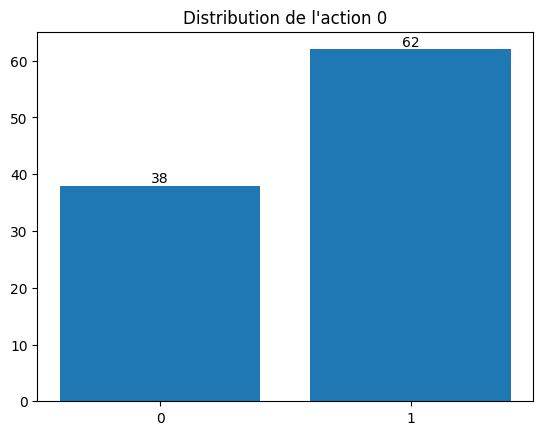

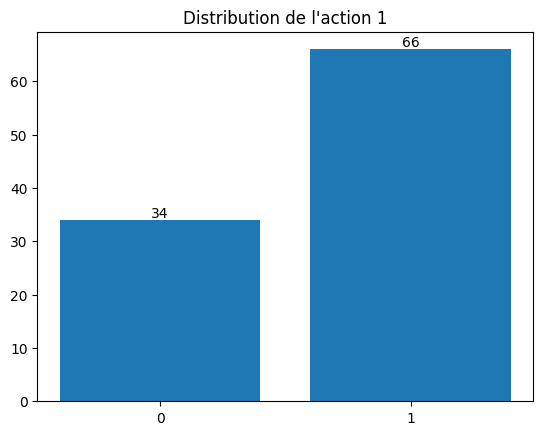

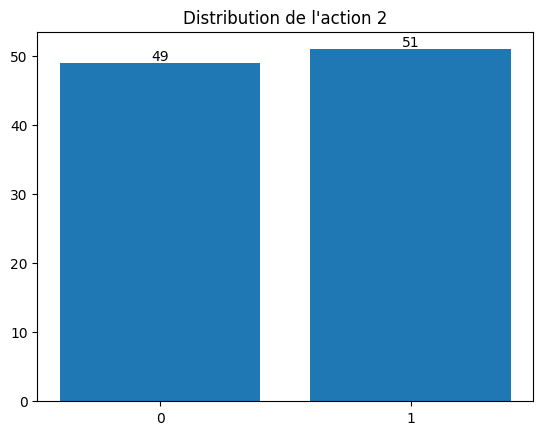

Moyenne empirique de l'action 0: 0.62
Moyenne empirique de l'action 1: 0.66
Moyenne empirique de l'action 2: 0.51


In [34]:
a0 = [instance.play(0) for _ in range(100)]
a1 = [instance.play(1) for _ in range(100)]
a2 = [instance.play(2) for _ in range(100)]

def plot_distribution(data, title):
    values, counts = np.unique(data, return_counts=True)
    bars = plt.bar(values, counts, tick_label=['0', '1'])
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height}',
                 ha='center', va='bottom')
    plt.title(f"Distribution de l'action {title}")
    plt.show()

# graphiques
plot_distribution(a0, '0')
plot_distribution(a1, '1')
plot_distribution(a2, '2')

# moyenne empirique
print("Moyenne empirique de l'action 0:", np.mean(a0))
print("Moyenne empirique de l'action 1:", np.mean(a1))
print("Moyenne empirique de l'action 2:", np.mean(a2))



#### Récompenses de distributions normales

Complétez le code suivant pour implémenter un simulateur de bandit stochastique à $k$ actions avec récompenses générées par des distributions normales. Votre classe doit recevoir en entrée l'espérance et la variance des récompenses pour chaque action, ainsi qu'un germe aléatoire permettant de fixer la réalisation de l'instance. La fonction _play_ doit échantillonner et retourner une récompense pour l'action demandée.

In [35]:
class NormalBandit(BernoulliBandit):

    def __init__(self, means, variances, seed=None):
        super().__init__([0] * len(means), seed)  # on n'utilise pas les probabilités du BernoulliBandit
        self.means = means
        self.variances = variances

    def play(self, action):
        action_reward = self.rng.normal(self.means[action], np.sqrt(self.variances[action]))
        self.action_history.append(action)
        self.reward_history.append(action_reward)

        return action_reward


Générez une instance de votre environnement avec la configuration $\boldsymbol \mu = (0.7, 0.6, 0.5)$ et une variance de récompenses $\sigma^2 = 1$ pour toutes les actions.

In [36]:
instance_normal = NormalBandit([0.7, 0.6, 0.5], [1, 1, 1])

Montrez que votre environnement fonctionne en jouant 100 fois chaque action sur votre instance. Collectez les récompenses et affichez la moyenne et la variance empiriques pour chaque action.

In [37]:
a0 = [instance_normal.play(0) for _ in range(100)]
a1 = [instance_normal.play(1) for _ in range(100)]
a2 = [instance_normal.play(2) for _ in range(100)]

print('la moyenne de a0 est ', round(np.mean(a0), 2), 'et la variance est ', round(np.var(a0), 2))
print('la moyenne de a1 est ', round(np.mean(a1), 2), 'et la variance est ', round(np.var(a1), 2))
print('la moyenne de a2 est ', round(np.mean(a2), 2), 'et la variance est ', round(np.var(a2), 2))

la moyenne de a0 est  0.71 et la variance est  0.98
la moyenne de a1 est  0.59 et la variance est  1.12
la moyenne de a2 est  0.62 et la variance est  0.95


### [10 points] Explore-Then-Commit (ETC)

Complétez le code suivant pour implémenter la stratégie ETC. Votre fonction doit recevoir en entrée l'instance de bandit à aborder, la durée de l'horizon de temps $T$, ainsi que la durée $m$ de la phase exploratoire accordée pour chaque action.

In [60]:
def etc(bandit: BernoulliBandit, T, m):
    actions_history = []
    n = bandit.n

    # Phase d'exploration
    for i in range(n):
        for _ in range(m):
            actions_history.append(i)
            bandit.play(i)

    mean_rewards = [np.mean([r for a, r in zip(bandit.action_history, bandit.reward_history) if a == i]) for i in range(n)]
    # Trouver l'action optimale
    optimal = np.argmax(mean_rewards)

    # Phase d'exploitation
    for _ in range(T - n * m):
        actions_history.append(optimal)
        bandit.play(optimal)

    return np.cumsum([max(bandit.probabilities) - bandit.probabilities[a] for a in actions_history])

Considérez l'instance de bandits $\boldsymbol \mu = (0.7, 0.6, 0.5)$ avec récompenses générées par des distributions de Bernoulli. Appliquez la stratégie ETC sur $N=100$ réalisations de cette instance sur un horizon temporel $T = 2000$. Comparez ETC pour $m=50$ tirages exploratoires par action avec ETC pour $m$ optimal selon la théorie : $$m_\text{optimal} = \left\lceil \frac{4 \sigma^2}{\Delta_-^2} \ln \left( \frac{T \Delta_-^2}{4 \sigma^2} \right) \right\rceil \quad \text{avec } \Delta_- = \min_{a\neq a_\star} \Delta_a$$

Supposez que le gap de sous-optimalité minimal $\Delta_-$ est connu.

Présentez une figure montrant le pseudo-regret cumulatif moyenné sur les réalisations, avec un écart-type au-dessus, pour chaque configuration de la stratégie. Affichez le pourcentage des réalisations pour lesquelles chaque variante a pu exploiter l'action optimale.

Valeur optimale de m pour ETC: 300
Pourcentage de réalisations qui converge vers action optimale m=50: 90.00%
Pourcentage de réalisations qui converge vers action optimale m=300: 100.00%


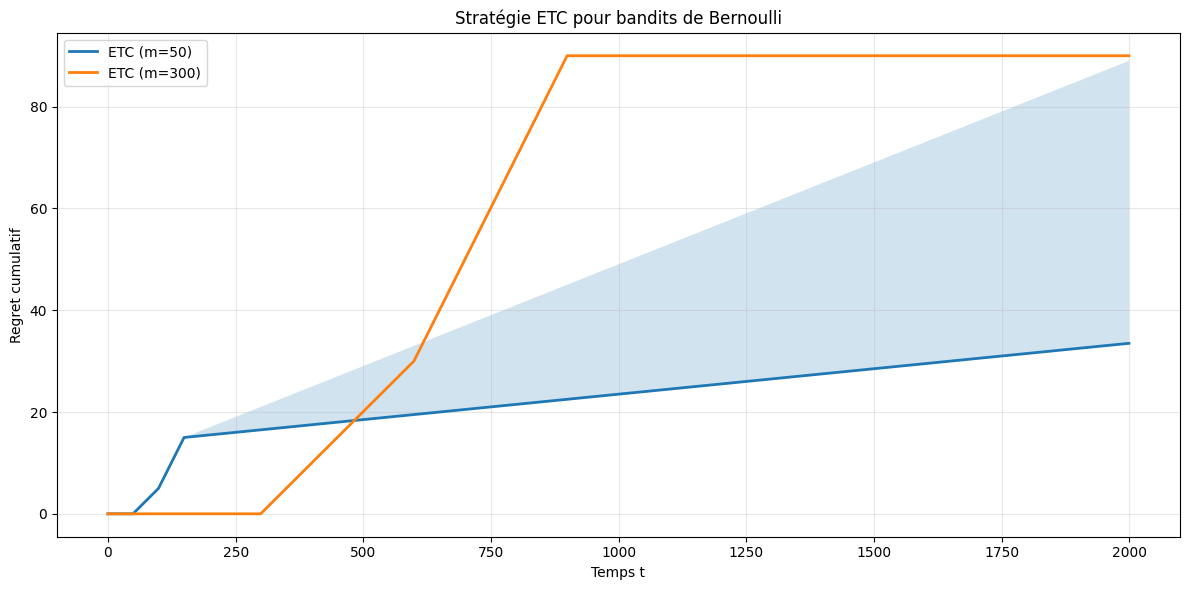

In [61]:
# Pour les distributions de Bernoulli, la variance maximale est 0.25
T = 2000
N = 100

sigma_squared = 0.25  
delta_minus = 0.7 - 0.6  
m_optimal = int(np.ceil((4 * sigma_squared / delta_minus**2) * np.log((T * delta_minus**2) / (4 * sigma_squared))))
print(f"Valeur optimale de m pour ETC: {m_optimal}")


m_values = [50, m_optimal]

plt.figure(figsize=(12, 6))

for m in m_values:
    regrets_all = [etc(BernoulliBandit(probabilities=[0.7, 0.6, 0.5], seed=i), T, m) for i in range(N)]
    mean_regrets = np.mean(regrets_all, axis=0)
    std_regrets = np.std(regrets_all, axis=0)

    last_regrets_change = [regrets[-1]-regrets[-2] for regrets in regrets_all]
    pourcentage_optimal_m300 = sum(1 for change in last_regrets_change if change == 0) / N * 100
    print(f"Pourcentage de réalisations qui converge vers action optimale m={m}: {pourcentage_optimal_m300:.2f}%")

    plt.plot(mean_regrets, label=f"ETC (m={m})", linewidth=2)
    plt.fill_between(range(len(mean_regrets)), mean_regrets, mean_regrets + std_regrets, alpha=0.2)
    plt.xlabel("Temps t")
    plt.ylabel("Regret cumulatif")
    plt.title("Stratégie ETC pour bandits de Bernoulli")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()


plt.show()


Expliquez les régimes observés sur les courbes ainsi que les différences entre les courbes. Supportez votre discussion à l'aide des taux de convergence à l'action optimale obtenus avec chaque valeur de $m$.

Pour les deux courbes ont voit la pahse d'exploration qui est noter par trois phase (1 par action) et une monté rapide de

Comme les espérences des actions sont proches, les deux stratégies ont besoin d'une phase d'exploration relativement longue pour différencier les actions et il reste des instances où l'action optimale n'est pas correctement identifiée pour m=50, ce qui explique l'écart type finaux du regret qui sont élevé. 

Cependant, on peut voir que les courbes suivent un régime  assez similaire sont assez similaires, mais on peut observer que la courbe avec m optimal a une légère tendance à être plus basse que celle avec m=50, ce qui suggère un regret cumulatif légèrement meilleur. 

Cela est cohérent avec le fait que m optimal est conçu pour minimiser le regret en équilibrant l'exploration et l'exploitation de manière plus efficace.

__[IFT-7201]__ Montrez comment obtenir l'équation de $m$ optimal sur un environnement à $k = 3$ actions.

Obgjectif est de minimiser le regret cumulatif.

exprimer sous forme de formule le regret final.



### [10 points] $\varepsilon$-greedy

Complétez le code suivant pour implémenter la stratégie $\varepsilon$-greedy avec taux d'exploration $\varepsilon$ fixe. Votre fonction doit recevoir en entrée l'instance de bandit à aborder, la durée de l'horizon de temps $T$, ainsi que le taux d'exploration $\varepsilon$.

In [40]:
def egreedy(bandit, T, epsilon, seed=None):
    rng = np.random.default_rng(seed)
    actions_history = []
    count_actions = np.zeros(bandit.n)
    means_actions = np.zeros(bandit.n)

    action = None
    for t in range(T):
        if t < bandit.n:
            action = t  

        else:
            if rng.random() < epsilon:
                action = rng.integers(bandit.n)  
            else:
                action = np.argmax(means_actions)
        
        actions_history.append(action)

        reward = bandit.play(action)
        count_actions[action] += 1
        means_actions[action] = ((count_actions[action]-1) * means_actions[action] + reward) / count_actions[action]

    return actions_history

Considérez l'instance de bandits $\boldsymbol \mu = (0.7, 0.6, 0.5)$ avec récompenses générées par des distributions de Bernoulli. Appliquez la stratégie $\varepsilon$-greedy sur $N=100$ réalisations de cette instance sur un horizon temporel $T = 1000$. Comparez $\varepsilon$-greedy pour $\varepsilon \in \{0, 1/8, 1/4, 1/2, 1\}$.

Présentez une figure montrant le pseudo-regret cumulatif moyenné sur les réalisations, avec un écart-type au-dessus, pour chaque configuration de la stratégie. Affichez le nombre de fois en moyenne (avec un écart-type) où l'action optimale est sélectionnée sur l'instance considérée avec chaque configuration de la stratégie.

Pour epsilon=0, action optimale sélectionnée en moyenne: 629.4 +/- 473.6
Pour epsilon=0.125, action optimale sélectionnée en moyenne: 826.4 +/- 163.1
Pour epsilon=0.25, action optimale sélectionnée en moyenne: 795.0 +/- 87.4
Pour epsilon=0.5, action optimale sélectionnée en moyenne: 632.5 +/- 63.0
Pour epsilon=1, action optimale sélectionnée en moyenne: 333.5 +/- 15.7


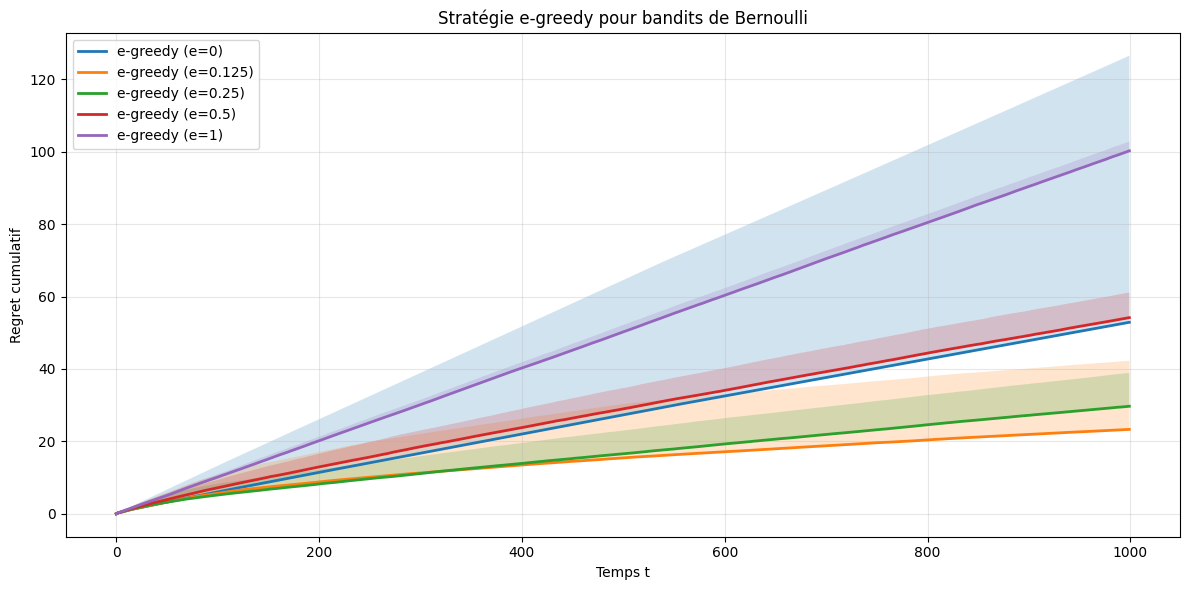

In [58]:
N = 100
T = 1000

epsilons = [0, 1/8, 1/4, 1/2, 1]

plt.figure(figsize=(12, 6))

for e in epsilons:
    probabilities=[0.7, 0.6, 0.5]
    action_history = [egreedy(BernoulliBandit(probabilities=probabilities, seed=i), T, e, seed=i) for i in range(N)]

    optimal_Action = np.argmax(probabilities)
    count_optimal_actions = [actions.count(optimal_Action) for actions in action_history]
    print(f"Pour epsilon={e}, action optimale sélectionnée en moyenne: {np.mean(count_optimal_actions):.1f} +/- {np.std(count_optimal_actions):.1f}")


    regrets_all = [np.cumsum([max(probabilities) - probabilities[a] for a in actions]) for actions in action_history]
    mean_regrets = np.mean(regrets_all, axis=0)
    std_regrets = np.std(regrets_all, axis=0)


    plt.plot(mean_regrets, label=f"e-greedy (e={e})", linewidth=2)
    plt.fill_between(range(len(mean_regrets)), mean_regrets, mean_regrets + std_regrets, alpha=0.2)
    plt.xlabel("Temps t")
    plt.ylabel("Regret cumulatif")
    plt.title("Stratégie e-greedy pour bandits de Bernoulli")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()

plt.show()

Expliquez les différences observées entre les courbes. Expliquez les nombres de tirages de l'action optimale en référant aux bornes inférieures sur le pseudo-regret cumulatif de la stratégie $\varepsilon$-greedy pour les configurations $\varepsilon = 0$ et $\varepsilon = 1$.

Intuitivement, trop d'exploration ajoute du regret comme l'action optimal n'est pas choisi


epsilon 0 correspond à seulement de l'Exploration et epsilon 1 seulement de l'exploitation.

epsilon 0 va donc choisir une action aléatoire à chaque temps, ce qui donne un grand écart type et une borne inférieur egal à delta

epsilon 1 va choisir la même action pour chaque temps dépendant du résultat obtenue par le premier tirage de chaque action, comme les action sont proche 

### [10 points] UCB

Complétez le code suivant pour implémenter la stratégie UCB1 (Auer et al., 2002). Votre fonction doit recevoir en entrée l'instance de bandit à aborder ainsi que la durée de l'horizon de temps $T$.

In [42]:
def ucb1(bandit, T):
    actions_history = []

    actions_mean_rewards = np.zeros(bandit.n)
    actions_count = np.zeros(bandit.n)
    
    for t in range(T):
        action = 0
        if t < bandit.n:
            action = t
        else:
            exploration = np.sqrt((2 * np.log(t)) / actions_count)
            prediction = actions_mean_rewards + exploration
            action = np.argmax(prediction)
        
        actions_history.append(action)

        reward = bandit.play(action)
        
        actions_count[action] += 1
        actions_mean_rewards[action] += (reward - actions_mean_rewards[action]) / actions_count[action]

    return np.cumsum([max(bandit.probabilities) - bandit.probabilities[a] for a in actions_history])

Considérez l'instance de bandits $\boldsymbol \mu = (0.7, 0.6, 0.5)$ avec récompenses générées par des distributions de Bernoulli. Appliquez la stratégie UCB1 sur $N=100$ réalisations de cette instance sur un horizon temporel $T = 1000$.

Présentez une figure montrant le pseudo-regret cumulatif moyenné sur les réalisations, avec un écart-type au-dessus.

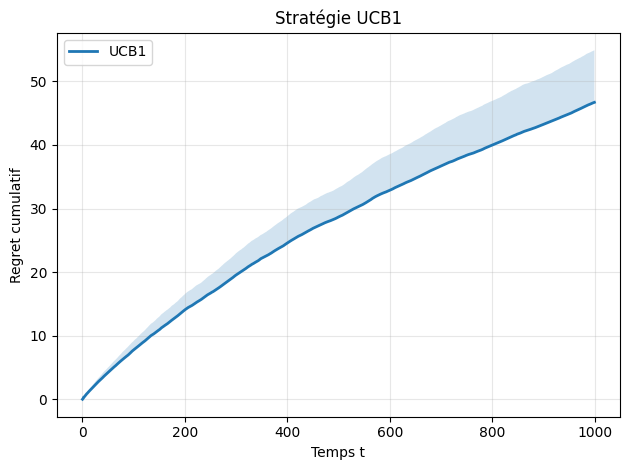

In [43]:

#####
N = 100
T = 1000

all_regrets = [ucb1(BernoulliBandit([0.7, 0.6, 0.5]), T) for _ in range(N)]

mean = np.mean(all_regrets, axis=0)
std = np.std(all_regrets, axis=0)
plt.plot(mean, label=f"UCB1", linewidth=2)
plt.fill_between(range(len(mean)), mean, mean + std, alpha=0.2)

plt.xlabel("Temps t")
plt.ylabel("Regret cumulatif")
plt.title("Stratégie UCB1")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Expliquez la forme de la courbe obtenue.

### [10 points] Thompson Sampling (TS)

Complétez le code suivant pour implémenter la stratégie TS destinée à des bandits stochastiques dont les récompenses suivent des distributions normales de variance connue $\sigma^2$. Votre fonction doit recevoir en entrée l'instance de bandit à aborder, la durée de l'horizon de temps $T$, la valeur des paramètres a priori ($\mu_0$ et $\sigma_0$), ainsi que la variance des observations ($\sigma^2$).

In [44]:
def ts_normal(bandit, T, mu_0, sigma_0, sigma):
    actions_history = []
    n = bandit.n
    
    mu_posts = np.array([mu_0] * n, dtype=float)
    sigma_posts = np.array([sigma_0] * n, dtype=float)
    
    for t in range(T):
        theta_samples = np.random.normal(mu_posts, sigma_posts)
        action = np.argmax(theta_samples)
        

        reward = bandit.play(action)
        actions_history.append(action)
        
        precision_prior = 1 / (sigma_posts[action] ** 2)
        precision_obs = 1 / (sigma ** 2)
        precision_post = precision_prior + precision_obs
        
        mu_posts[action] = (precision_prior * mu_posts[action] + precision_obs * reward) / precision_post
        sigma_posts[action] = np.sqrt(1 / precision_post)
    return np.cumsum([max(bandit.means) - bandit.means[a] for a in actions_history])


Considérez la classe d'environnements à 10 actions dont les récompenses suivent des distributions normales de variance $\sigma^2 = 1$ et dont les configurations sont telles que $\mu_a \sim \mathcal N(2, 1)$. Appliquez la stratégie TS à 100 instances de cette classe (une réalisation par instance) sur un horizon temporel $T = 1000$.

Présentez une figure montrant le pseudo-regret cumulatif moyenné sur les réalisations, avec un écart-type au-dessus.

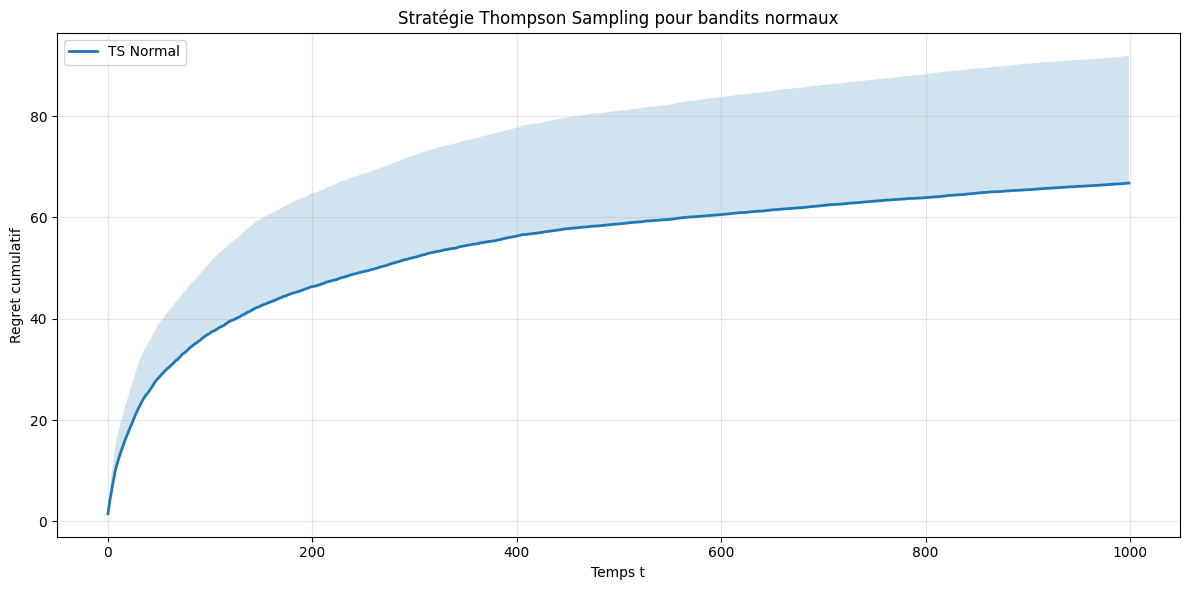

In [45]:
N = 100
T = 1000
sigma = 1
mu_0 = 2
sigma_0 = 1

regrets_all = [ts_normal(NormalBandit(np.random.normal(2, 1, 10), [sigma**2]*10, seed=1), T, mu_0, sigma_0, sigma) for _ in range(N)]
mean_regrets = np.mean(regrets_all, axis=0)
std_regrets = np.std(regrets_all, axis=0)


plt.figure(figsize=(12, 6))
plt.plot(mean_regrets, label="TS Normal", linewidth=2)
plt.fill_between(range(len(mean_regrets)), mean_regrets, mean_regrets + std_regrets, alpha=0.2)
plt.xlabel("Temps t")
plt.ylabel("Regret cumulatif")
plt.title("Stratégie Thompson Sampling pour bandits normaux")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Justifiez le choix des paramètres a priori utilisés dans votre expérience.

### [10 points] Apprentissage par le gradient de la politique

Complétez le code suivant pour implémenter la stratégie d'apprentissage par gradient de la politique avec _baseline_ $B_t$ correspondant à la moyenne des récompenses observées jusqu'au temps $t-1$. Votre fonction doit recevoir en entrée l'instance de bandit à aborder, la durée de l'horizon de temps $T$, ainsi que le taux d'apprentissage $\alpha > 0$.

In [46]:
def policy_gradient(bandit, T, alpha):
    actions_history = []
    total_rewards = 0
    n = bandit.n
    preferences = np.zeros(n)

    for t in range(T):
        pi = np.exp(preferences) / np.sum(np.exp(preferences))
        base_line_value = total_rewards / t if t > 0 else 0

 
        action = np.random.choice(n, p=pi)

        actions_history.append(action)
        reward = bandit.play(action)
        total_rewards += reward

        for i in range(len(preferences)):
            if i == action:
                preferences[i] += alpha * (reward - base_line_value) * (1 - pi[actions_history[-1]])
            else:
                preferences[i] -= alpha * (reward - base_line_value) * (pi[i])


    return np.cumsum([max(bandit.means) - bandit.means[a] for a in actions_history])

Considérez la classe d'environnements à 10 actions dont les récompenses suivent des distributions normales de variance $\sigma^2 = 1$ et dont les configurations sont telles que $\mu_a \sim \mathcal N(0, 1)$. Appliquez la stratégie d'apprentissage par gradient de politique à 100 instances de cette classe (une réalisation par instance) sur un horizon temporel $T = 2000$ avec différentes valeurs de taux d'apprentissage $\alpha \in \{ 1/50, 1/10, 1/2 \}$.

Présentez une figure montrant le pseudo-regret cumulatif moyenné sur les réalisations, avec un écart-type au-dessus, pour chaque configuration de la stratégie.

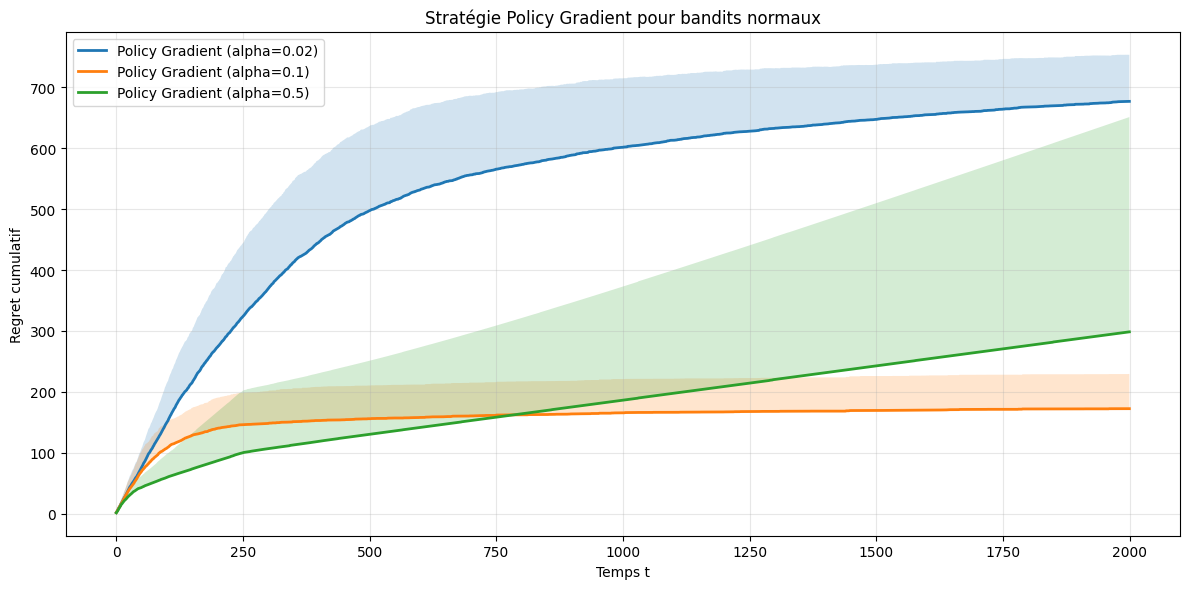

In [47]:
N = 10
T = 2000
sigma = 1

alphas = [1/50, 1/10, 1/2]

plt.figure(figsize=(12, 6))
for alpha in alphas:
    regrets_all = [policy_gradient(NormalBandit(np.random.normal(0, 1, 10), [sigma**2]*10, seed=i), T, alpha) for i in range(N)]
    mean_regrets = np.mean(regrets_all, axis=0)
    std_regrets = np.std(regrets_all, axis=0)


    plt.plot(mean_regrets, label=f"Policy Gradient (alpha={alpha})", linewidth=2)
    plt.fill_between(range(len(mean_regrets)), mean_regrets, mean_regrets + std_regrets, alpha=0.2)
    plt.xlabel("Temps t")
    plt.ylabel("Regret cumulatif")
    plt.title("Stratégie Policy Gradient pour bandits normaux")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
plt.show()

Discutez de l'impact du taux d'apprentissage en vous appuyant sur les résultats obtenus. Expliquez notamment la forme des courbes en référant au compromis entre l'exploration et l'exploitation.

Chaque courbe à une transition décaler vers l'exploitation, plus le gradient est bas plus il prend du temps avant de passer en mode exploration, mais on vois aussi qu'il y a moins de regret cumuler durant la phase d'exploitation pour un gradient plus petit 

## Les bandits stochastiques contextuels

### [10 points] Les environnements de bandits stochastiques linéaires

Vous travaillez dans une entreprise comprenant différents systèmes qui mériteraient d'être optimisés. Vous aimeriez investiguer le potentiel des stratégies de bandits stochastiques linéaires pour aborder la tâche d'ajustement des paramètres d'un système de manière à maximiser sa performance.

Complétez le code suivant pour implémenter un simulateur générique permettant de réaliser des expériences sur des problèmes de bandits stochastiques linéaires adaptés à cette application. Considérez que chaque récompense $R_t$ est générée en appliquant un bruit $\eta_t \sim \mathcal N(0, \sigma^2)$ à la fonction de performance évaluée à l'action $A_t$. Votre classe doit recevoir en entrée la fonction de caractéristiques à utiliser, le paramètre $\omega_\star$ gouvernant la fonction de récompense, la variance du bruit $\sigma^2$, la liste des actions discrètres considérées ($x_1, x_2, \dots, x_k$), ainsi qu'un germe aléatoire permettant de fixer la réalisation de l'instance. La fonction _play_ doit échantillonner et retourner une récompense pour l'action d'indice donné.

In [48]:
class LinGaussianBandit:
    def __init__(self, phi, omega, noise_variance, action_space, seed=None):
        self.phi = phi
        self.omega = omega
        self.noise_variance = noise_variance
        self.action_space = action_space
        self.rng = np.random.default_rng(seed)
        self.noise = lambda: self.rng.normal(0, np.sqrt(self.noise_variance))
    
    def play(self, action):
        features = self.phi(self.action_space[action])
        reward = np.dot(features, self.omega) + self.noise()
        return reward

Considérez une instance spécifique de cet environnement caractérisée par une variance du bruit $\sigma^2 = 0.01$, un espace d'action $\mathcal X$ fini et discret correspondant à 100 valeurs régulièrement espacées sur l'intervalle $[0, 1]$, la fonction de caractéristique $\varphi(x) = (1, x, x^2, x^3, x^4, x^5, x^6, x^7)$, ainsi que le paramètre $\omega_\star$ suivant : 

In [49]:
omega = np.array([0.41218989, 0.51717332, 0.40751546, 0.03405839, -0.29501341, -0.53931605, -0.07674824, -0.10778418])

phi = lambda x: np.array([1, x, x**2, x**3, x**4, x**5, x**6, x**7])

lineGaussianBandit = LinGaussianBandit(phi, omega, noise_variance=0.01, action_space=np.linspace(0, 1, 100), seed=1)

Pour montrer que votre environnement fonctionne, présentez une réalisation de cette instance pour 50 actions sélectionnées aléatoirement sur $\mathcal X$. Votre figure devrait contenir la fonction de récompense attendue en plus des récompenses échantillonnées.

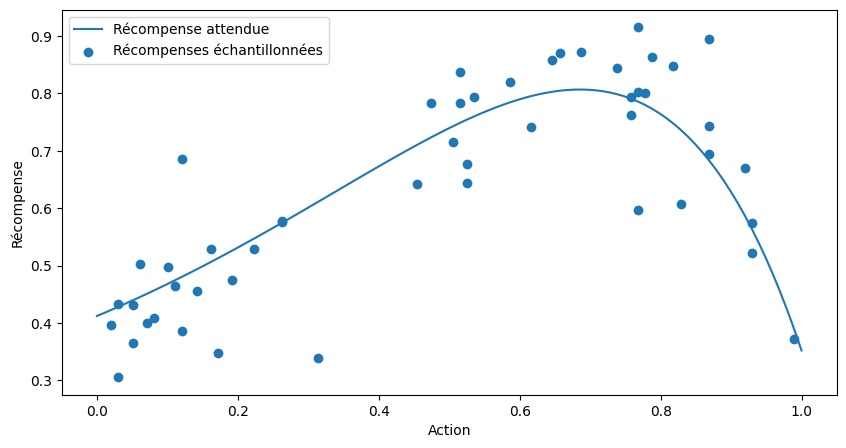

In [50]:
actions = np.random.choice(len(lineGaussianBandit.action_space), 50)
rewards = [lineGaussianBandit.play(a) for a in actions]
expected_rewards = [np.dot(phi(lineGaussianBandit.action_space[a]), omega) for a in actions]

plt.figure(figsize=(10, 5))
plt.plot(lineGaussianBandit.action_space, [np.dot(phi(x), omega) for x in lineGaussianBandit.action_space], label='Récompense attendue')
plt.scatter(lineGaussianBandit.action_space[actions], rewards, label='Récompenses échantillonnées')
plt.xlabel('Action')
plt.ylabel('Récompense')
plt.legend()
plt.show()

À quoi pourrait correspondre le bruit dans cette application?

### [15 points] OFUL

Complétez le code suivant pour implémenter la stratégie OFUL adaptée au type d'environnement décrit précédemment. Votre fonction doit recevoir en entrée l'instance de bandits stochastiques linéaires à aborder, la durée de l'horizon de temps $T$, le paramètre de régularisation $\lambda$, la variance du bruit $\sigma^2$, ainsi que la norme $\lVert \omega_\star \rVert_2$. Considérez que la première action effectuée ($A_1$) est choisie aléatoirement uniformément sur l'espace des actions et utilisez un niveau de confiance $\delta = 1/t$.

In [51]:
def oful(bandit, T, regularization=1.0, noise_variance=0.01, norm_function=1.0):
    d = len(bandit.omega)
    V_inv = (1.0 / regularization) * np.eye(d)
    b = np.zeros(d)

    phi_matrix = np.array([bandit.phi(x) for x in bandit.action_space])
    optimal_reward = np.max(phi_matrix @ bandit.omega)

    regrets = []

    for t in range(1, T + 1):
        theta_hat = V_inv @ b
        alpha = np.sqrt(regularization) * norm_function + np.sqrt(2 * np.log(t + 1)) * np.sqrt(noise_variance)

        uncertainty = np.sqrt(np.sum((phi_matrix @ V_inv) * phi_matrix, axis=1))
        scores = phi_matrix @ theta_hat + alpha * uncertainty
        action_idx = np.argmax(scores)

        reward = bandit.play(action_idx)
        phi_t = phi_matrix[action_idx]

        expected_reward = np.dot(phi_t, bandit.omega)
        regrets.append(optimal_reward - expected_reward)

        phi_t_col = phi_t.reshape(-1, 1)
        V_inv_phi = V_inv @ phi_t_col
        V_inv = V_inv - (V_inv_phi @ V_inv_phi.T) / (1 + phi_t_col.T @ V_inv_phi)

        b += reward * phi_t

    return np.cumsum(regrets)


Comment se traduit le niveau de confiance $\delta$ considéré sur les intervalles de confiance considérés?

Le niveau de confiance devient plus séréré

Appliquez la stratégie OFUL sur $N=100$ réalisations de l'instance de bandits stochastiques linéaires décrite précédemment, sur un horizon temporel $T = 1000$ en supposant que la variance du bruit $\sigma^2$ et la norme $\lVert \omega_\star \rVert_2$ sont des informations connues. Investiguez l'impact de la régularisation en considérant $\lambda \in \{ 0.001, 0.01, 0.1, 1 \}$.

Présentez vos résultats sous la forme de figures montrant le pseudo-regret cumulatif moyenné sur les réalisations, avec un écart-type au-dessus.

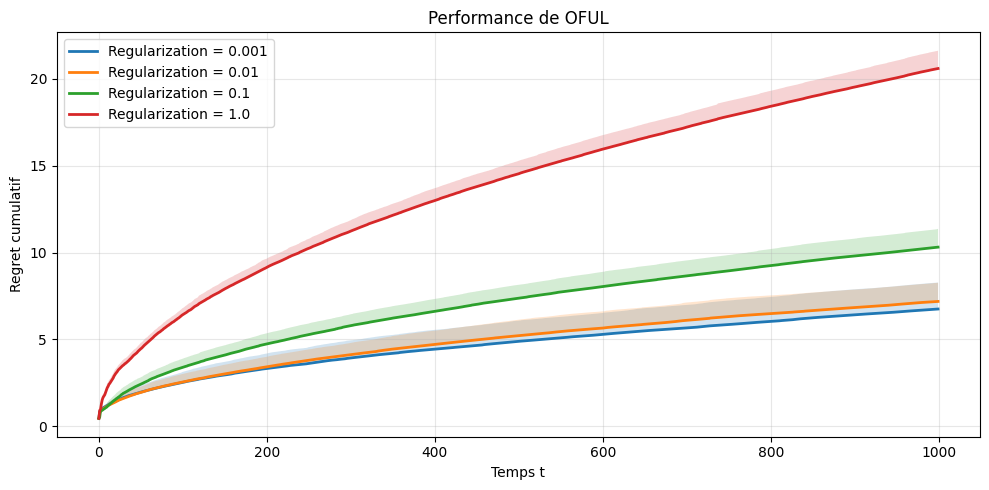

In [55]:
N = 100
T = 1000
phi = lambda x: np.array([1, x, x**2, x**3, x**4, x**5, x**6, x**7])

regularization_values = [0.001, 0.01, 0.1, 1.0]

plt.figure(figsize=(10, 5))

for regularization in regularization_values:
    all_regrets = [
        oful(
            LinGaussianBandit(phi, omega, noise_variance=0.01, action_space=np.linspace(0, 1, 100), seed=i), 
            T, 
            regularization=regularization, 
            noise_variance=0.01, 
            norm_function=np.linalg.norm(omega)
        ) 
        for i in range(N)
    ]

    mean_regret = np.mean(all_regrets, axis=0)
    std_regret = np.std(all_regrets, axis=0)
    plt.plot(mean_regret, label=f'Regularization = {regularization}', linewidth=2)
    plt.fill_between(range(len(mean_regret)), mean_regret, mean_regret + std_regret, alpha=0.2)
    plt.xlabel('Temps t')
    plt.ylabel('Regret cumulatif')
    plt.title('Performance de OFUL')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
plt.show()
  

Expliquez les résultats obtenus.

__[IFT-7201]__ En pratique, il peut arriver que la variance du bruit soit inconnue, donc qu'une estimation soit utilisée. Expliquez quel sera l'impact sur l'exploration et l'exploitation si la variance du bruit est sous/sur-estimée.

### [15 points] TS pour bandits stochastiques linéaires

Complétez le code suivant pour implémenter une stratégie TS linéaire adaptée au type d'environnement décrit précédemment. Votre fonction doit recevoir en entrée l'instance de bandits stochastiques linéaires à aborder, la durée de l'horizon de temps $T$, le paramètre de régularisation $\lambda$, ainsi que la variance du bruit $\sigma^2$. Considérez que la première action effectuée ($A_1$) est choisie aléatoirement uniformément sur l'espace des actions.

In [53]:
def lints(bandit, T, regularization, noise_variance):
    d = len(bandit.omega)
    
    V_inv = (1.0 / regularization) * np.identity(d)
    b = np.zeros((d, 1))
    
    rewards = []
    regrets = []

    for t in range(1, T + 1):
        # Échantillonnage
        theta_hat = V_inv @ b
        theta_t = np.random.multivariate_normal(theta_hat.flatten(), noise_variance * V_inv)

        best_arm = None
        max_value = -np.inf

        for action_idx in range(len(bandit.action_space)):
            phi_a = bandit.phi(bandit.action_space[action_idx]).reshape(-1, 1)
            value = phi_a.T @ theta_t.reshape(-1, 1)

            if value > max_value:
                max_value = value
                best_arm = action_idx

        reward = bandit.play(best_arm)
        rewards.append(reward)

        # Regret sans bruit 
        optimal_reward = np.max([np.dot(bandit.phi(a), bandit.omega) for a in bandit.action_space])
        chosen_reward_expected = np.dot(bandit.phi(bandit.action_space[best_arm]), bandit.omega)
        
        regrets.append(optimal_reward - chosen_reward_expected)

        # Mise à jour
        x = bandit.phi(bandit.action_space[best_arm]).reshape(-1, 1)
        V_inv_x = V_inv @ x
        denom = 1.0 + (x.T @ V_inv_x)
        V_inv -= (V_inv_x @ V_inv_x.T) / denom
        b += reward * x

    return np.cumsum(regrets)



Appliquez la stratégie LinTS sur $N=100$ réalisations de l'instance de bandits décrite précédemment, sur un horizon temporel $T = 1000$ en supposant que la variance du bruit est connue. Investiguez l'impact de la régularisation en considérant $\lambda \in \{ 0.001, 0.01, 0.1, 1 \}$.

Présentez vos résultats sous la forme de figures montrant le pseudo-regret cumulatif moyenné sur les réalisations, avec un écart-type au-dessus.

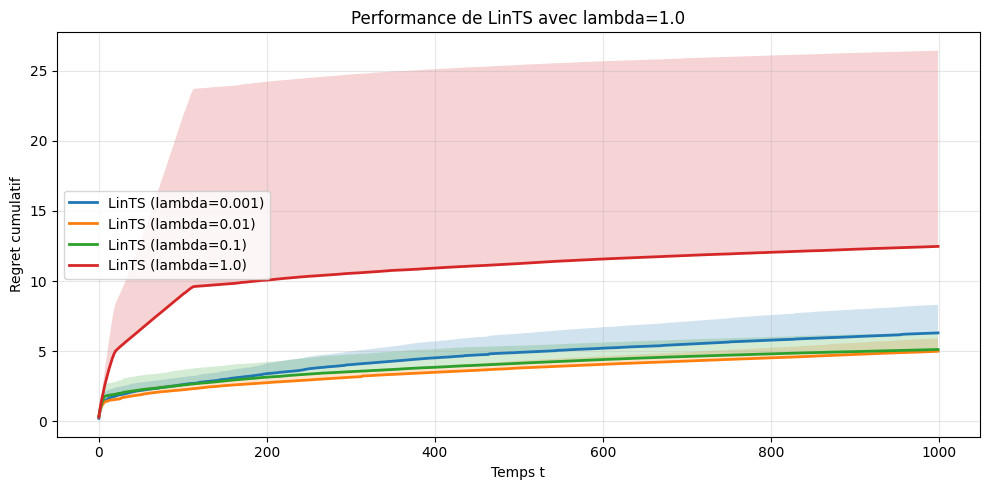

In [54]:
N = 10
T = 1000
sigma = 0.1
regularization_values = [0.001, 0.01, 0.1, 1.0] 

plt.figure(figsize=(10, 5))
for regu in regularization_values:
    all_regrets = [lints(LinGaussianBandit(phi, omega, noise_variance=sigma**2, action_space=np.linspace(0, 1, 100), seed=1), T, regularization=regu, noise_variance=sigma**2) for _ in range(N)]
    
    mean_regret = np.mean(all_regrets, axis=0)
    std_regret = np.std(all_regrets, axis=0)
    

    plt.plot(mean_regret, label=f'LinTS (lambda={regu})', linewidth=2)
    plt.fill_between(range(len(mean_regret)), mean_regret, mean_regret + std_regret, alpha=0.2)
    plt.xlabel('Temps t')
    plt.ylabel('Regret cumulatif')
    plt.title(f'Performance de LinTS avec lambda={regu}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
plt.show()

Discutez des résultats obtenus en comparaison avec les résultats obtenus en utilisant la stratégie OFUL.